In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
from scipy.interpolate import interp1d
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [318]:
df = pd.read_excel('gas_model_data_convert.xlsx')

In [264]:
df.replace(-9999, np.nan, regex=True, inplace = True)
df[columns_to_int].min()

air_molar_volume      0.023152
e                   571.920000
wind_speed            0.056612
max_wind_speed        0.614675
wind_dir              0.039097
dtype: float64

In [321]:
df.drop(columns=['Unnamed: 0', 'Date', 'Time','date_x', 'time','filename', 'date_y', 'Month',
       'Day', 'daytime','UNIXTIME', 'Дата', 'Время','Напр АКБ', 'Температура логгера', 'Направление ветра', 
        'ALB_1_1_1 (альбедо)', 'LWIN_1_1_1 ', 'LWOUT_1_1_1',
       'PPFD_1_1_1 плотность потока фотосинтетических фотонов облучающего поверхность в микромоль/м2/сек.',
       'P_RAIN_1_1_1 (осадки)', 'RH_1_1_1 ()',
       'RN_1_1_1 (радиационный баланс)', 'SWIN_1_1_1 (коротковолновая рад)',
       'SWOUT_1_1_1', 'TA_1_1_1', 'TS_1_1_1', 'TS_2_1_1', 'TS_3_1_1',
       'TS_4_1_1', 'TS_5_1_1', 'TS_6_1_1', 'filename', 'date_y', 'Month',
       'Day', 'daytime', 'air_molar_volume', 'e', 'wind_speed',
       'max_wind_speed', 'wind_dir', 'u*'], inplace = True)

In [322]:
df.columns

Index(['NEE_f потокСО2 (таргет)', 'LE_f скрытое тепло (испарение)',
       'H_f (скрытое тепло)', 'Rg_f (суммарная радиация)',
       'VPD_f (дефицит водяного пара)', 'rH_f (относительная влажность)',
       'Tair_f ', 'Tsoil_f', 'Reco_DT', 'GPP_DT', 'Reco_DT_SD', 'GPP_DT_SD',
       'datetime', 'Отн. влажность', 'Точка росы', 'Осадки',
       'Температура воздуха', 'Атмосферное давление', 'Скорость ветра',
       'Приходящая солнечная радиация', 'Влагосодержание почвы',
       'Электропроводность почвы', 'Температура почвы'],
      dtype='object')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEE_f потокСО2 (таргет)         4416 non-null   float64       
 1   LE_f скрытое тепло (испарение)  4416 non-null   float64       
 2   H_f (скрытое тепло)             4416 non-null   float64       
 3   Rg_f (суммарная радиация)       4416 non-null   float64       
 4   VPD_f (дефицит водяного пара)   4416 non-null   float64       
 5   rH_f (относительная влажность)  4416 non-null   float64       
 6   Tair_f                          4416 non-null   float64       
 7   Tsoil_f                         4416 non-null   float64       
 8   Reco_DT                         4416 non-null   float64       
 9   GPP_DT                          4416 non-null   float64       
 10  Reco_DT_SD                      4416 non-null   float64       
 11  GPP_

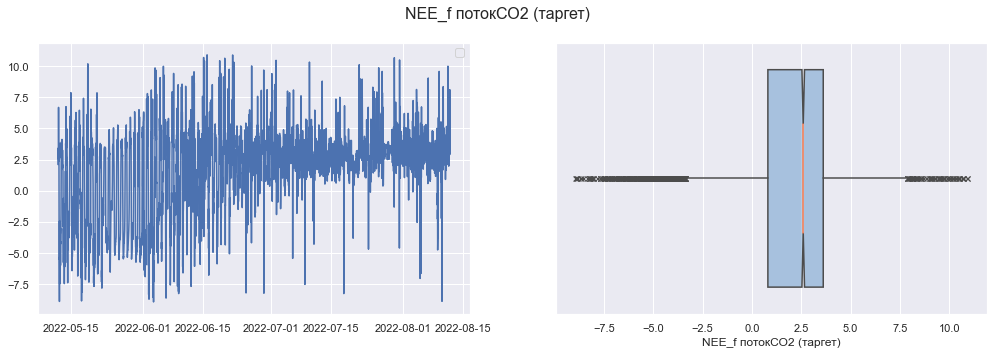

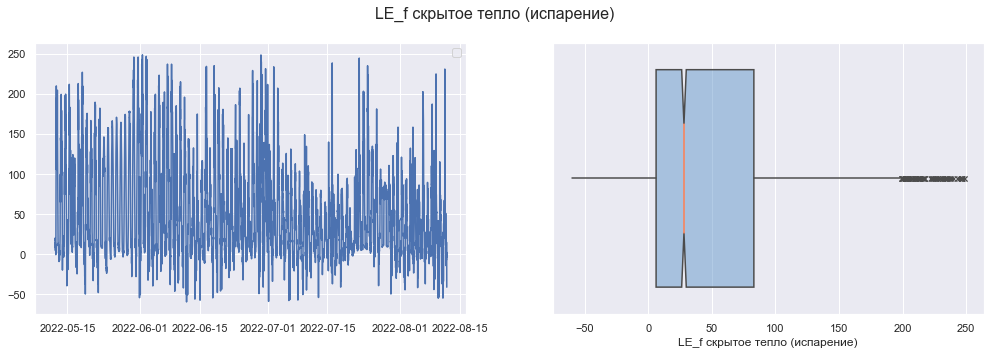

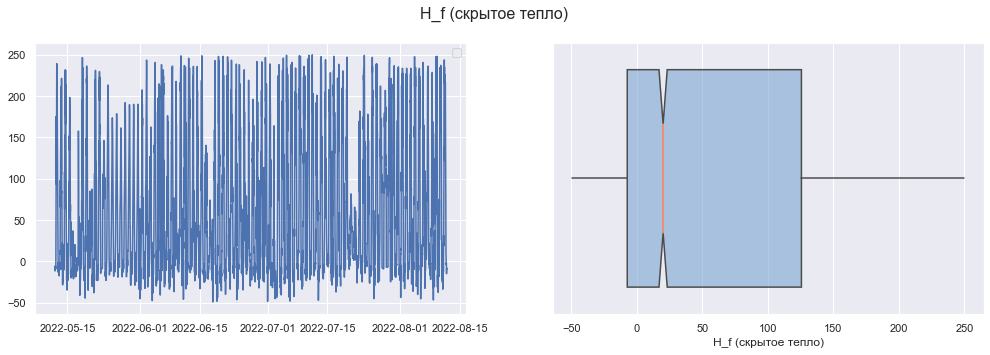

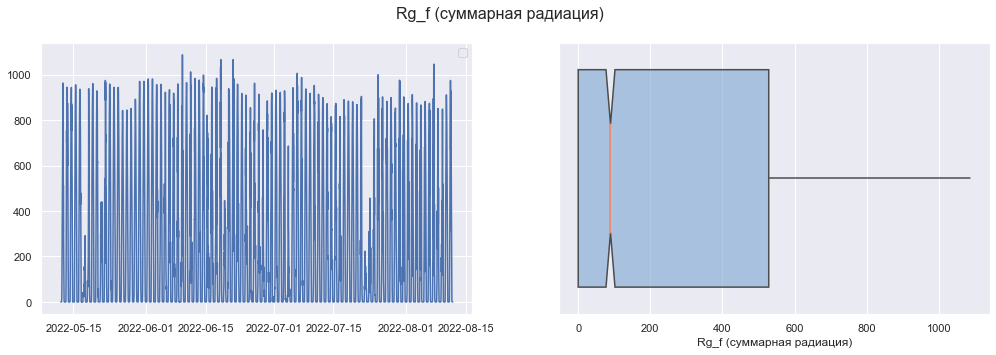

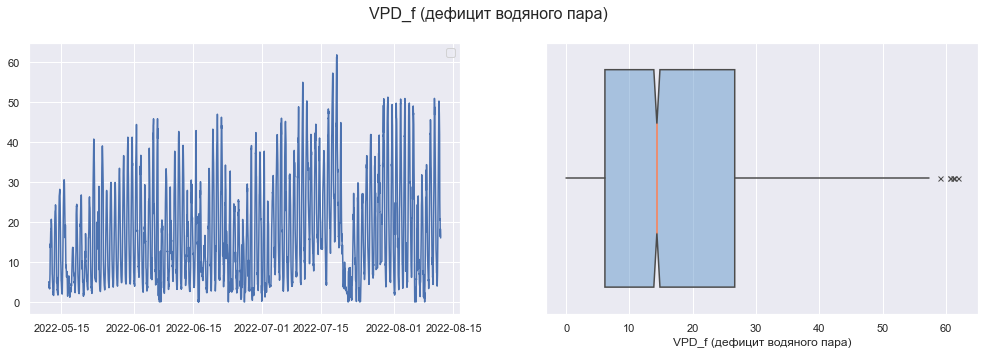

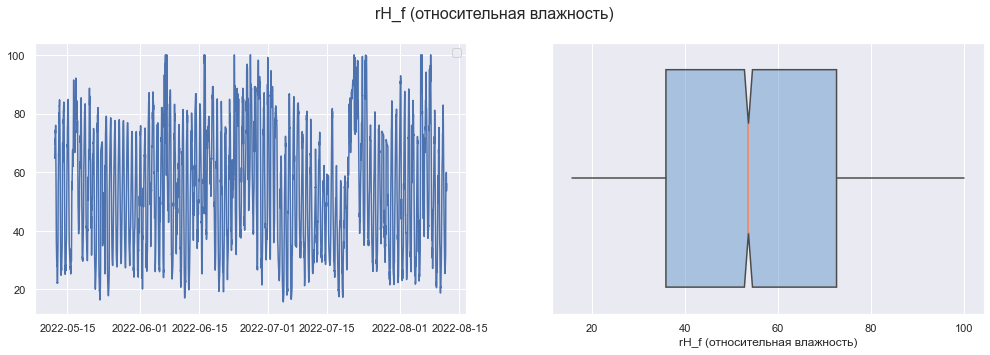

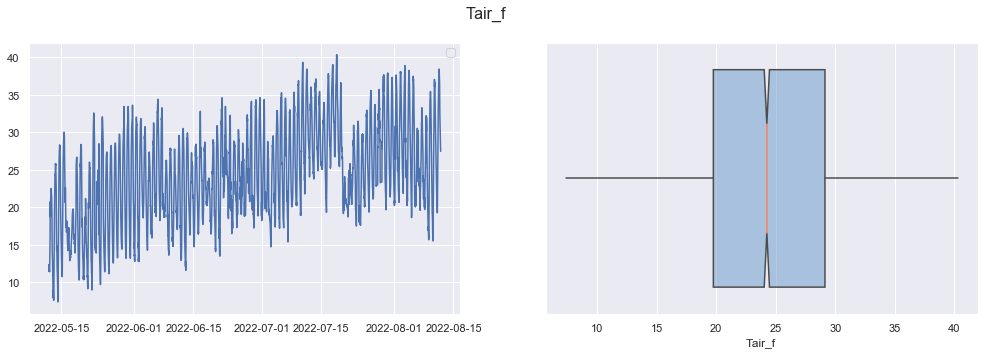

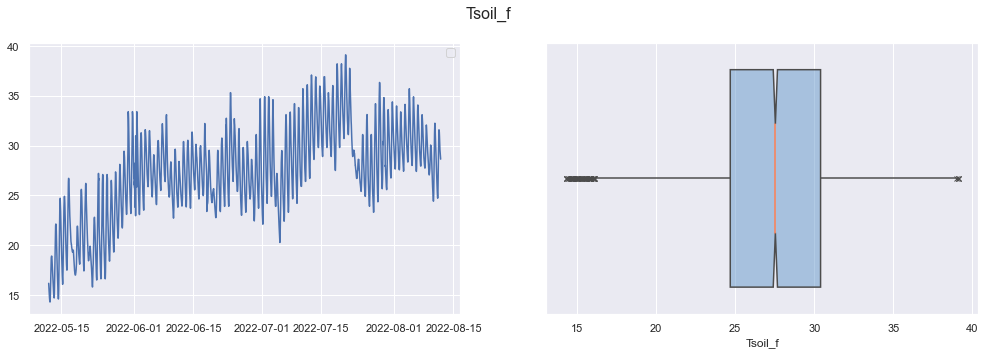

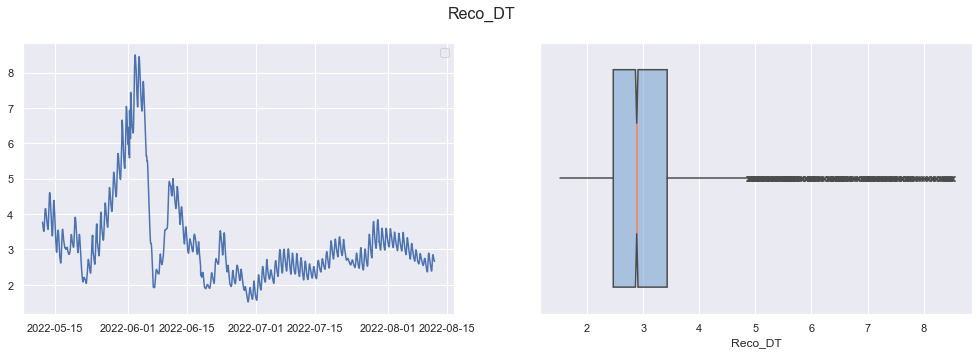

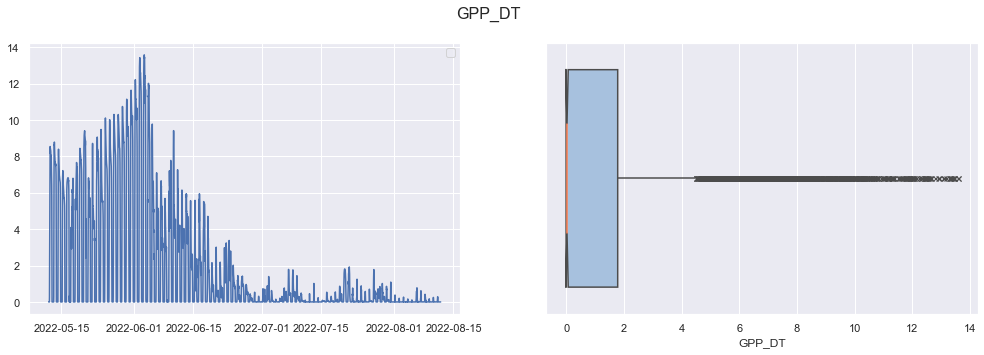

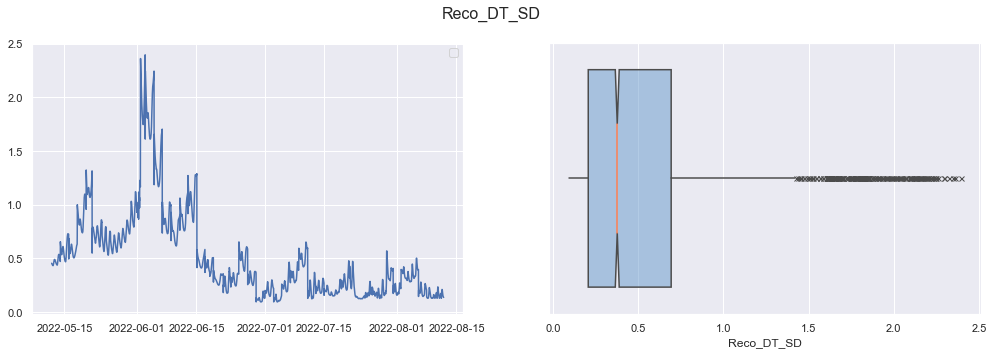

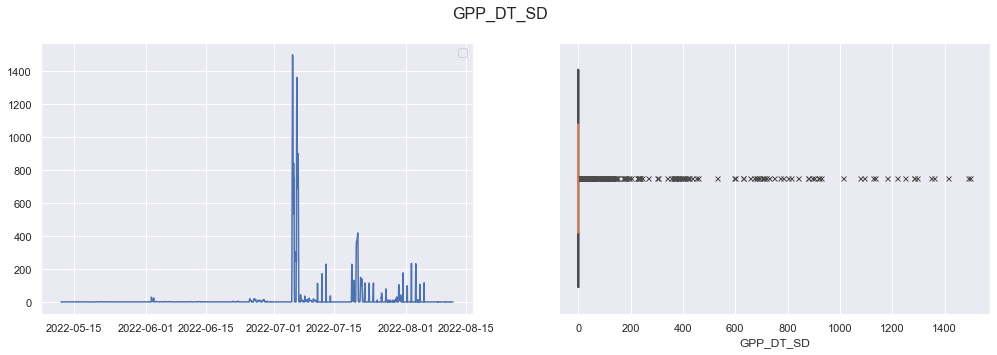

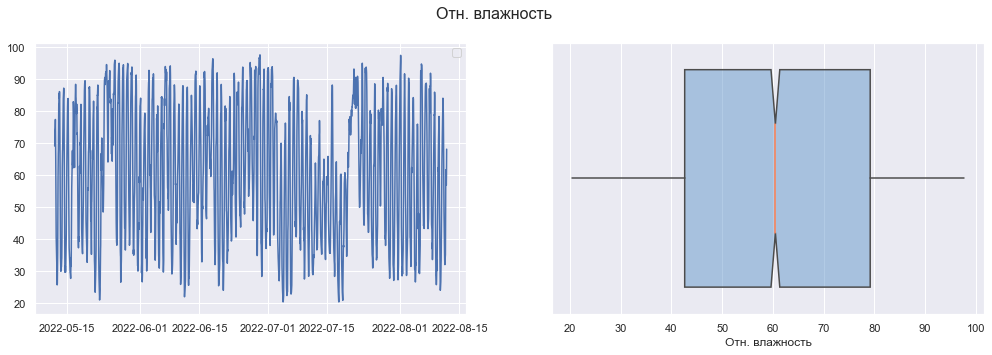

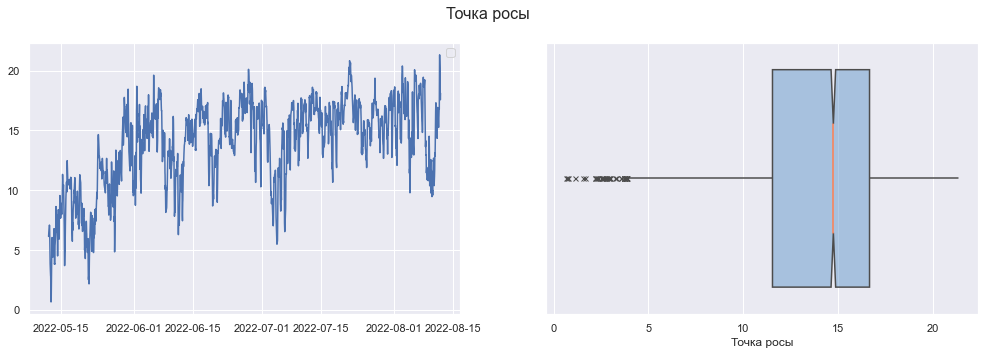

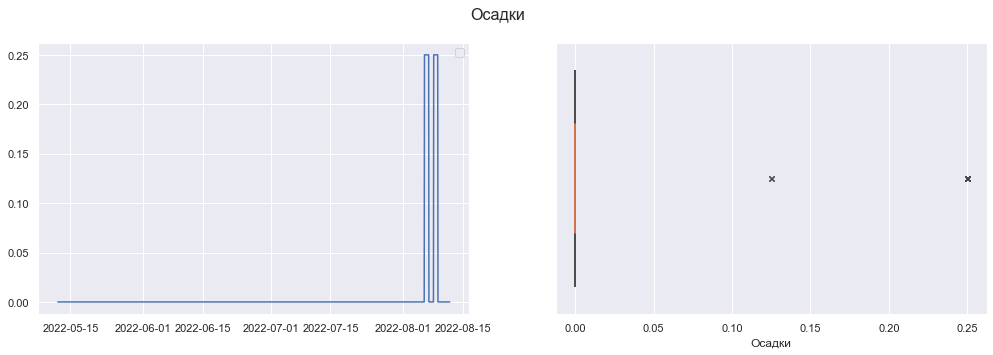

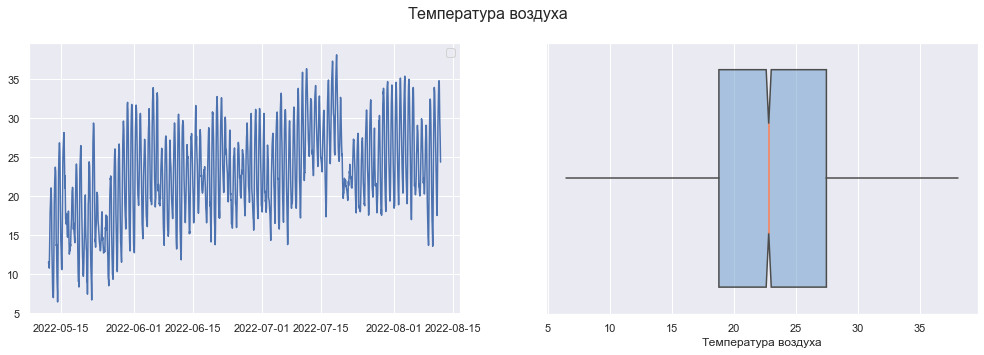

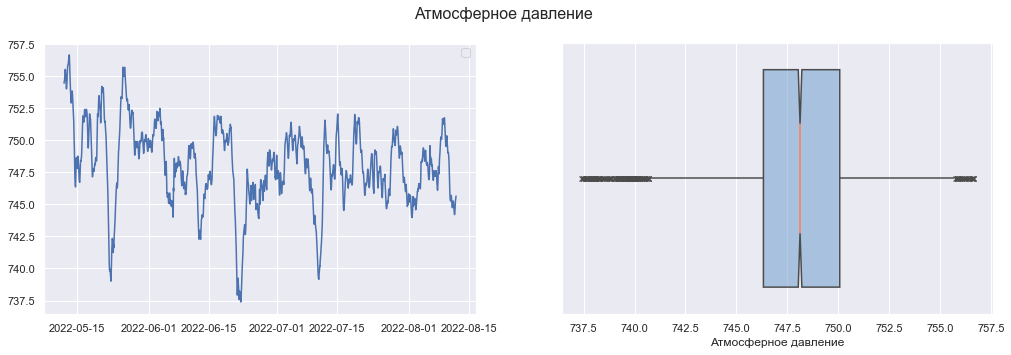

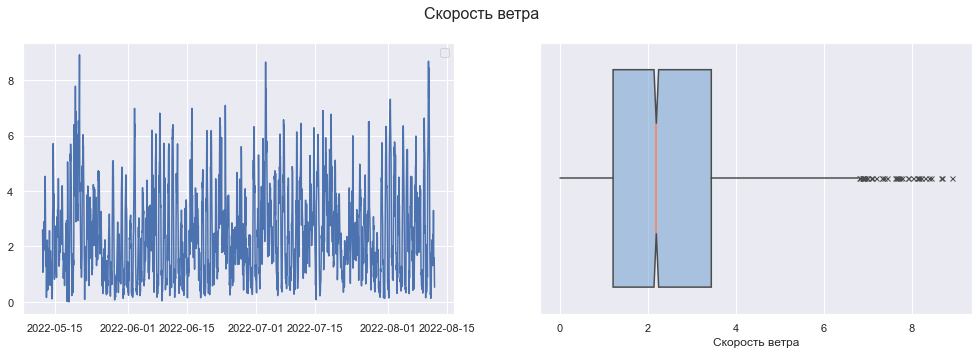

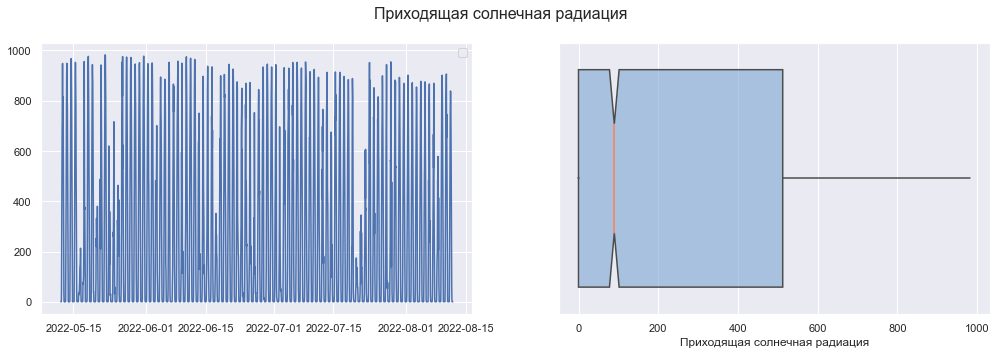

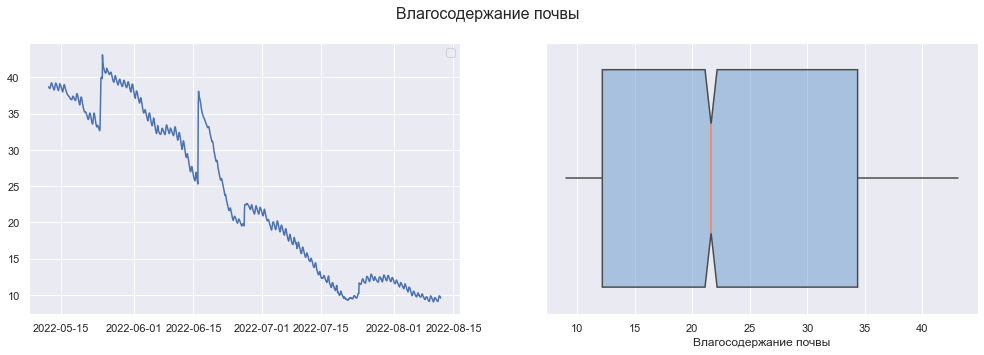

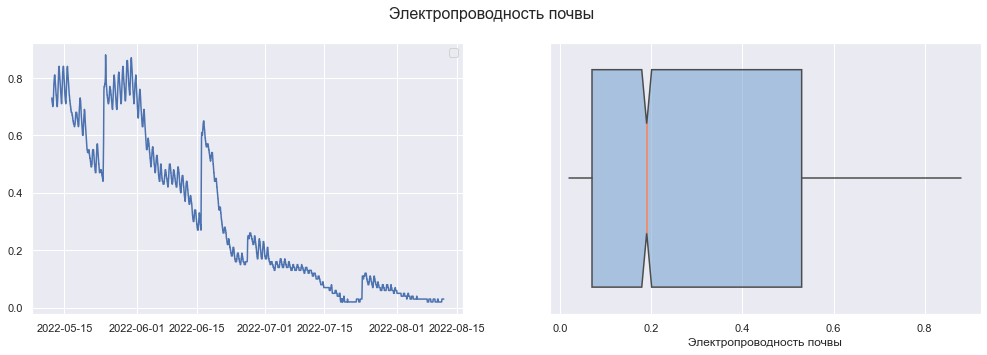

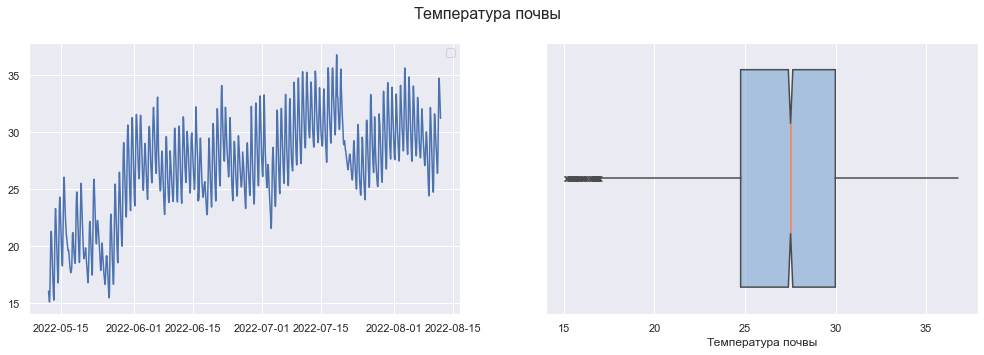

In [324]:
columns = list(df.columns)
columns.remove('datetime')
for i in columns:
    fig, (ax1, ax2) = plt.subplots(figsize=(17, 5),ncols=2,sharex=False, sharey=False)
    line1, = ax1.plot(df['datetime'],df[i])
    ax1.legend(handles=[line1])
    sns.boxplot(ax=ax2, x = df[i], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},)
    fig.suptitle(i, fontsize=16)

In [328]:
df.dropna(inplace = True)
df.isnull().sum()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415 entries, 1 to 4415
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEE_f потокСО2 (таргет)         4415 non-null   float64       
 1   LE_f скрытое тепло (испарение)  4415 non-null   float64       
 2   H_f (скрытое тепло)             4415 non-null   float64       
 3   Rg_f (суммарная радиация)       4415 non-null   float64       
 4   VPD_f (дефицит водяного пара)   4415 non-null   float64       
 5   rH_f (относительная влажность)  4415 non-null   float64       
 6   Tair_f                          4415 non-null   float64       
 7   Tsoil_f                         4415 non-null   float64       
 8   Reco_DT                         4415 non-null   float64       
 9   GPP_DT                          4415 non-null   float64       
 10  Reco_DT_SD                      4415 non-null   float64       
 11  GPP_

<AxesSubplot:>

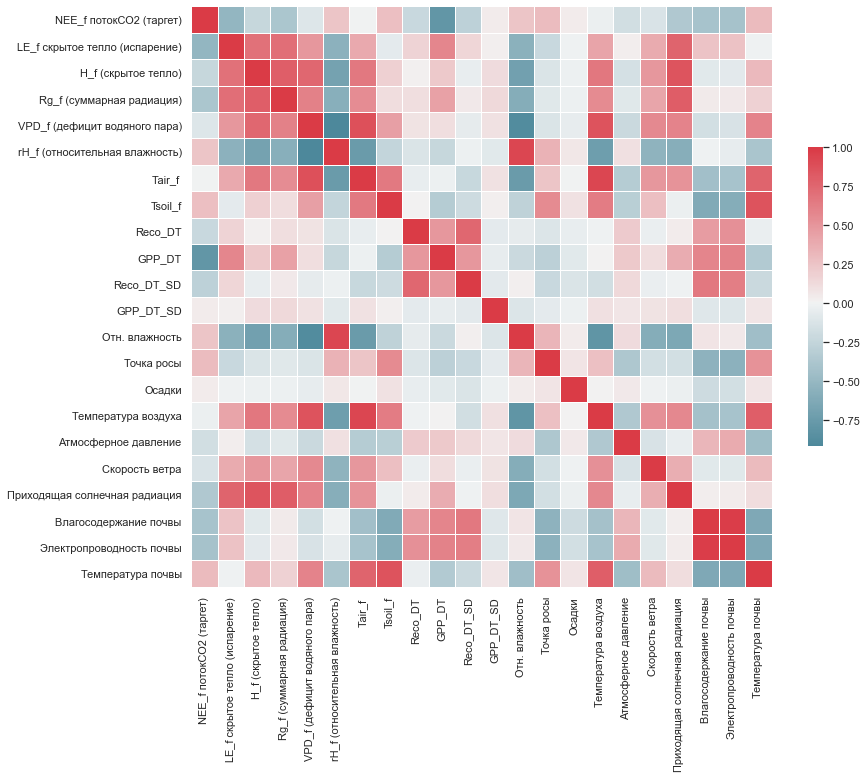

In [334]:
corr = df.corr()
f, ax = plt.subplots(figsize=(13, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0., square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4415 entries, 1 to 4415
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEE_f потокСО2 (таргет)         4415 non-null   float64       
 1   LE_f скрытое тепло (испарение)  4415 non-null   float64       
 2   H_f (скрытое тепло)             4415 non-null   float64       
 3   Rg_f (суммарная радиация)       4415 non-null   float64       
 4   VPD_f (дефицит водяного пара)   4415 non-null   float64       
 5   rH_f (относительная влажность)  4415 non-null   float64       
 6   Tair_f                          4415 non-null   float64       
 7   Reco_DT                         4415 non-null   float64       
 8   GPP_DT                          4415 non-null   float64       
 9   datetime                        4415 non-null   datetime64[ns]
 10  Отн. влажность                  4415 non-null   float64       
 11  Точк

In [346]:
# df.drop(columns=['Tsoil_f', 'Reco_DT_SD', 'GPP_DT_SD'], inplace = True)
df.drop(columns=[['Tair_f']], inplace = True)

KeyError: "[('Tair_f',)] not found in axis"